# DALI 2024 Winter Application - Machine Learning Track
### John Guerrerio

We now attempt to determine if there is any correlation between different features within the Superstore dataset.  This serves two purposes: informing feature engineering for a classifier to predict if a purchase will make above or below the median profit, and potentially drawing conclusions that would allow the superstore to run more efficiently

In [10]:
from scipy.stats import f_oneway
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import numpy as np

In [11]:
df = pd.read_csv('Superstore.csv')

## Statistical Tests

In this section, we use an ANOVA statistical test to determine if there is a statistically significant relationship between profit and various qualitative features in the dataset.  \
\
For all of these tests, we consider alpha < 0.05 to be significant.\
\
To use an ANOVA test, we make the following assumptions:
- The distributions of the different categories for the independent variable are normal
- The variance of the distributions of the different categories for the independent variable are equal
- Each sale is independent from the others

### Correlation Between Region and Profit

In [12]:
west = df.loc[df['Region'] == "West"]["Profit"].dropna().tolist()
south = df.loc[df['Region'] == "South"]["Profit"].dropna().tolist()
east = df.loc[df['Region'] == "Central"]["Profit"].dropna().tolist()
central = df.loc[df['Region'] == "Central"]["Profit"].dropna().tolist()

print(f_oneway(west, south, central, east))

F_onewayResult(statistic=5.466615529683573, pvalue=0.0009460319609385047)


The results are statistically significant - there is a strong correlation between region and profit

### Correlation Between Product Category and Profit

In [13]:
office = df.loc[df['Category'] == "Office Supplies"]["Profit"].dropna().tolist()
furniture = df.loc[df['Category'] == "Furniture"]["Profit"].dropna().tolist()
technology = df.loc[df['Category'] == "Technology"]["Profit"].dropna().tolist()

print(f_oneway(office, furniture, technology))

F_onewayResult(statistic=47.883597327054986, pvalue=2.1206374409101864e-21)


The results are statistically significant - there is a strong correlation between product category and profit


### Correlation Between Product Sub-Category and Profit

In [14]:
binders = df.loc[df['Sub-Category'] == "Binders"]["Profit"].dropna().tolist()
paper = df.loc[df['Sub-Category'] == "Paper"]["Profit"].dropna().tolist()
furnishings = df.loc[df['Sub-Category'] == "Furnishings"]["Profit"].dropna().tolist()
phones = df.loc[df['Sub-Category'] == "Phones"]["Profit"].dropna().tolist()
storage = df.loc[df['Sub-Category'] == "Storage"]["Profit"].dropna().tolist()
art = df.loc[df['Sub-Category'] == "Art"]["Profit"].dropna().tolist()
accessories = df.loc[df['Sub-Category'] == "Accessories"]["Profit"].dropna().tolist()
chairs = df.loc[df['Sub-Category'] == "Chairs"]["Profit"].dropna().tolist()
appliances = df.loc[df['Sub-Category'] == "Appliances"]["Profit"].dropna().tolist()
labels = df.loc[df['Sub-Category'] == "Labels"]["Profit"].dropna().tolist()
tables = df.loc[df['Sub-Category'] == "Tables"]["Profit"].dropna().tolist()
envelopes = df.loc[df['Sub-Category'] == "Envelopes"]["Profit"].dropna().tolist()
bookcases = df.loc[df['Sub-Category'] == "Bookcases"]["Profit"].dropna().tolist()
fasteners = df.loc[df['Sub-Category'] == "Fasteners"]["Profit"].dropna().tolist()
supplies = df.loc[df['Sub-Category'] == "Supplies"]["Profit"].dropna().tolist()
machines = df.loc[df['Sub-Category'] == "Machines"]["Profit"].dropna().tolist()
copiers = df.loc[df['Sub-Category'] == "Copiers"]["Profit"].dropna().tolist()

print(f_oneway(binders, paper, furnishings, phones, storage, art, accessories, chairs, appliances, labels,
               tables, envelopes, bookcases, fasteners, supplies, machines, copiers))

F_onewayResult(statistic=48.35207803298308, pvalue=5.206200411171667e-147)


The results are statistically significant - there is a strong correlation between product sub-category and profit

### Correlation Between Ship Mode and Profit

In [15]:
standard = df.loc[df['Ship Mode'] == "Standard Class"]["Profit"].dropna().tolist()
second = df.loc[df['Ship Mode'] == "Second Class"]["Profit"].dropna().tolist()
first = df.loc[df['Ship Mode'] == "First Class"]["Profit"].dropna().tolist()
same = df.loc[df['Ship Mode'] == "Same Day"]["Profit"].dropna().tolist()

print(f_oneway(standard, second, first, same))

F_onewayResult(statistic=0.29844951666145975, pvalue=0.8265487674803774)


The results are not statistically significant - there is no correlation between ship mode and profit





### Correlation Between Segment and Profit

In [16]:
consumer = df.loc[df['Segment'] == "Consumer"]["Profit"].dropna().tolist()
corporate = df.loc[df['Segment'] == "Corporate"]["Profit"].dropna().tolist()
office = df.loc[df['Segment'] == "Home Office"]["Profit"].dropna().tolist()

print(f_oneway(consumer, corporate, office))

F_onewayResult(statistic=1.274058809795741, pvalue=0.27975014762339184)


The results are not statistically significant - there is no correlation between product segment and profit


## Regression

In this section, we use linear regression to determine if there is a linear relationship between different quantitative features in the dataset.  We use the correlation coefficient to measure the strength of the linear relationship between the two quantitative variables.

We drop all rows that have a null value for discount, profit, and/or quantity.  As we are assuming data is missing completely at random, this approach will not introduce bias into our results.  On the other hand, replacing all missing values with the median for that column (or another fixed value) could skew the linear regression

In [17]:
df.dropna(subset=["Discount", "Profit", "Quantity"], inplace=True)
print("Number of rows: " + str(df.shape[0])) # make sure we still have enough rows

Number of rows: 7313


In [18]:
discount = df["Discount"].to_numpy().reshape(-1, 1)
profit = df["Profit"].to_numpy().reshape(-1, 1)
quantity = df["Quantity"].to_numpy().reshape(-1, 1)

### Discount to Predict Profit

In [19]:
regr = linear_model.LinearRegression()
regr.fit(discount, profit)
predictions = regr.predict(discount)

In [20]:
print("Coefficients: \n", regr.coef_)
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(profit, predictions))

Coefficients: 
 [[-243.13355422]]
Coefficient of determination: 0.05


The correlation coefficient is 0.05, indicating there is little to no linear relationship between discount and proft.

---



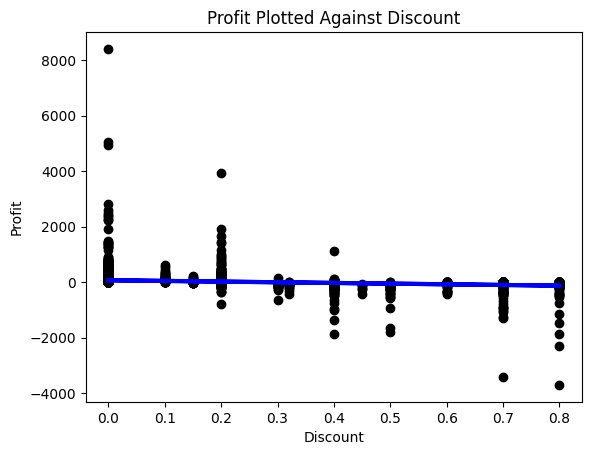

In [21]:
plt.scatter(discount, profit, color="black")
plt.title("Profit Plotted Against Discount")
plt.xlabel("Discount")
plt.ylabel("Profit")
plt.plot(discount, predictions, color="blue", linewidth=3)
plt.show()

Looking at the scatterplot, it seems there is little to no relationship, linear or otherwise, between profit and discount.




### Quantity to Predict Profit

In [22]:
regr = linear_model.LinearRegression()
regr.fit(quantity, profit)
predictions = regr.predict(quantity)

In [23]:
print("Coefficients: \n", regr.coef_)
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(profit, predictions))

Coefficients: 
 [[7.53206245]]
Coefficient of determination: 0.01


The correlation coefficient is 0.01, indicating there is little to no linear relationship between quantity and proft.

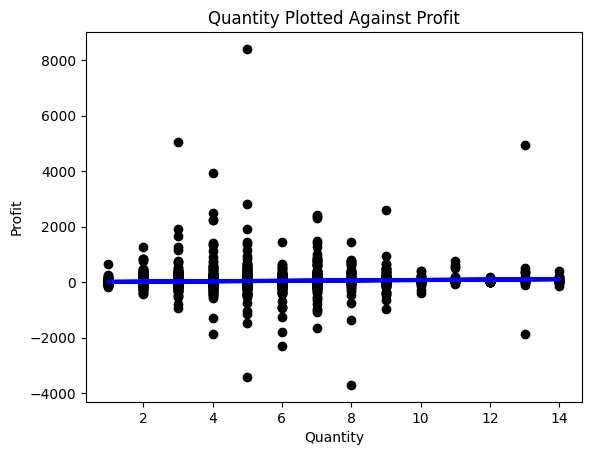

In [24]:
plt.scatter(quantity, profit, color="black")
plt.title("Quantity Plotted Against Profit")
plt.xlabel("Quantity")
plt.ylabel("Profit")
plt.plot(quantity, predictions, color="blue", linewidth=3)
plt.show()

Looking at the scatterplot, it seems there is little to no relationship, linear or otherwise, between quantity and profit.


### Discount to Predict Quanity

In [25]:
regr = linear_model.LinearRegression()
regr.fit(discount, quantity)
predictions = regr.predict(discount)

In [26]:
print("Coefficients: \n", regr.coef_)
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(quantity, predictions))

Coefficients: 
 [[0.00976227]]
Coefficient of determination: 0.00


The correlation coefficient is 0.00, indicating there is no linear relationship between discount and quantity.

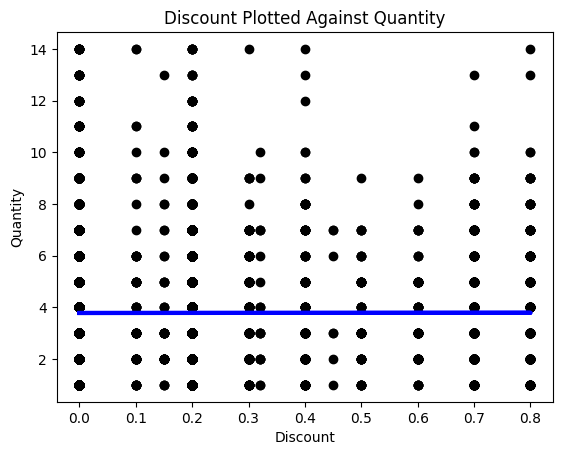

In [27]:
plt.scatter(discount, quantity, color="black")
plt.title("Discount Plotted Against Quantity")
plt.xlabel("Discount")
plt.ylabel("Quantity")
plt.plot(discount, predictions, color="blue", linewidth=3)
plt.show()

Looking at the scatterplot, it seems there is little to no relationship, linear or otherwise, between discount and quantity.